In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [10]:
Insurance_Data = pd.read_csv('carInsurance_train.csv')
Insurance_test = pd.read_csv('carInsurance_test.csv')

In [11]:
Insurance_Data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [12]:
Insurance_test.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,0.0
mean,4500.500000,41.473000,0.013000,1398.298000,0.513000,0.12100,15.546000,2.50800,51.653000,0.806000,NaN
std,288.819436,12.051577,0.113331,2660.408024,0.500081,0.32629,8.370541,2.57732,109.024855,2.034331,NaN
min,4001.000000,18.000000,0.000000,-1980.000000,0.000000,0.00000,1.000000,1.00000,-1.000000,0.000000,NaN
25%,4250.750000,32.000000,0.000000,114.750000,0.000000,0.00000,8.000000,1.00000,-1.000000,0.000000,NaN
50%,4500.500000,39.000000,0.000000,517.500000,1.000000,0.00000,15.000000,2.00000,-1.000000,0.000000,NaN
75%,4750.250000,49.250000,0.000000,1609.750000,1.000000,0.00000,21.000000,3.00000,-1.000000,0.000000,NaN
max,5000.000000,92.000000,1.000000,41630.000000,1.000000,1.00000,31.000000,34.00000,586.000000,20.000000,NaN


In [13]:
Insurance_test.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


In [15]:
Insurance_Data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [16]:
Insurance_Data.shape

(4000, 19)

In [18]:
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.8+ KB


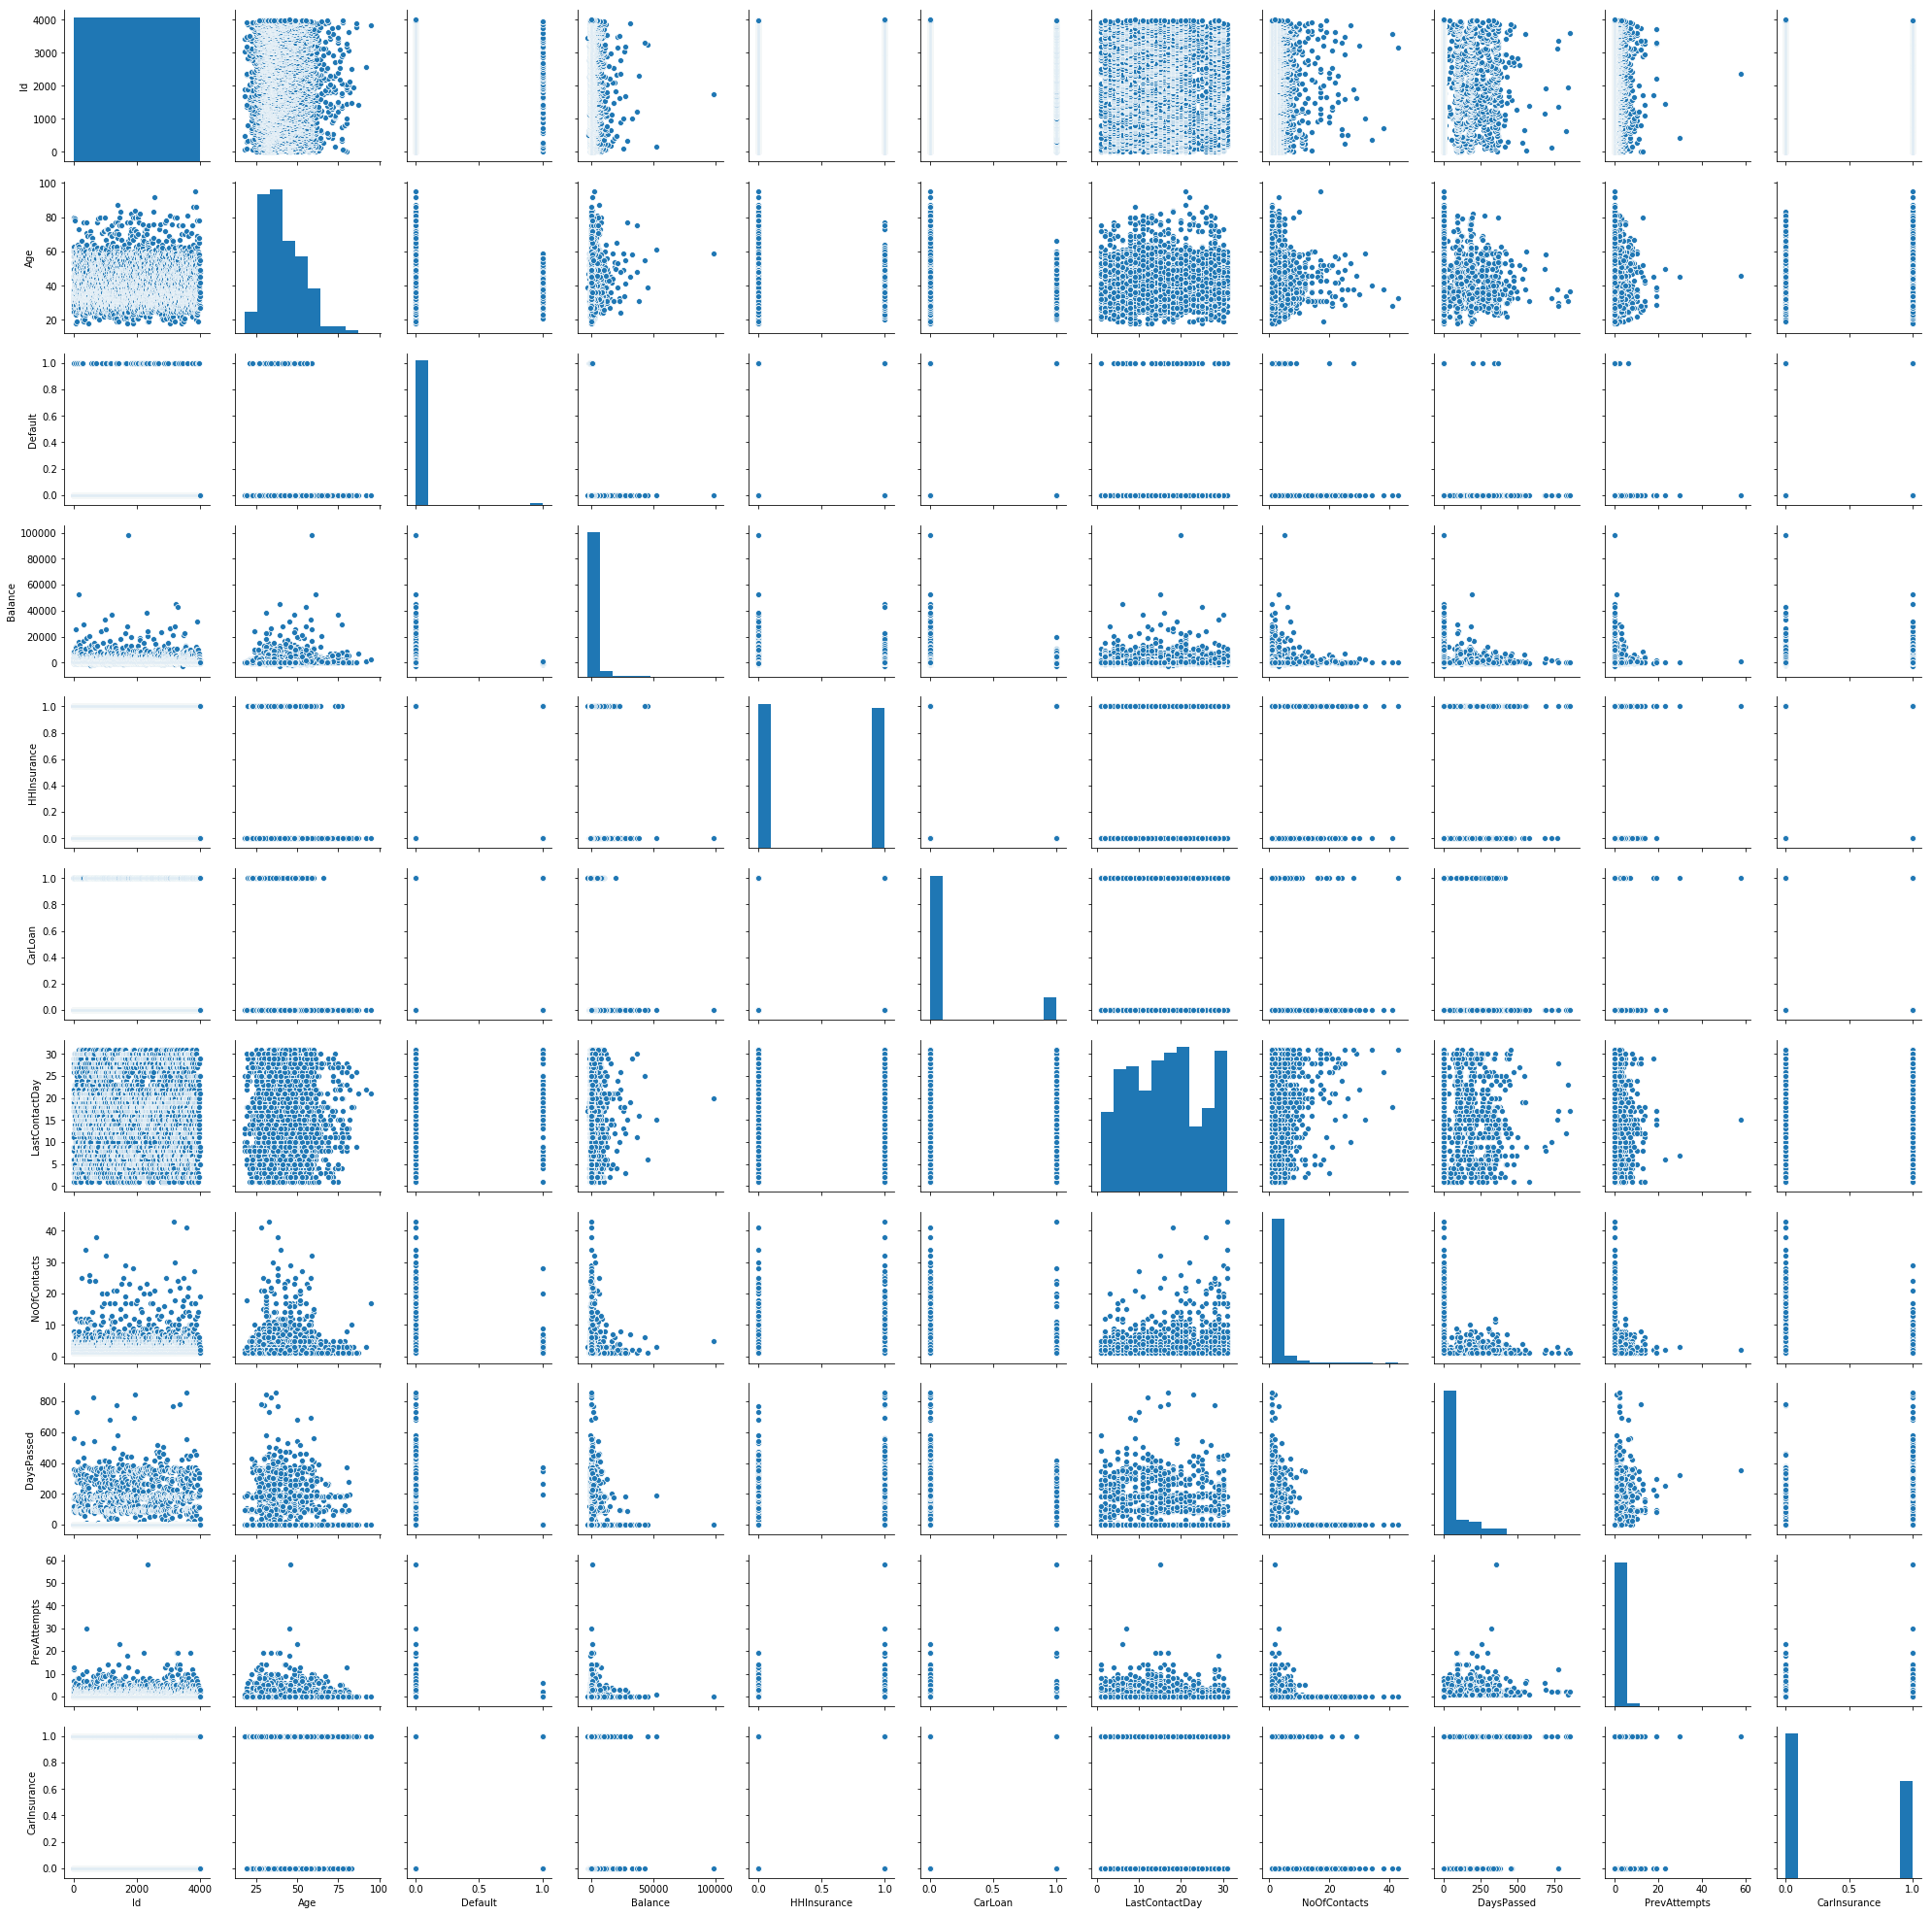

In [22]:
import seaborn as sns
sns.pairplot(Insurance_Data)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/

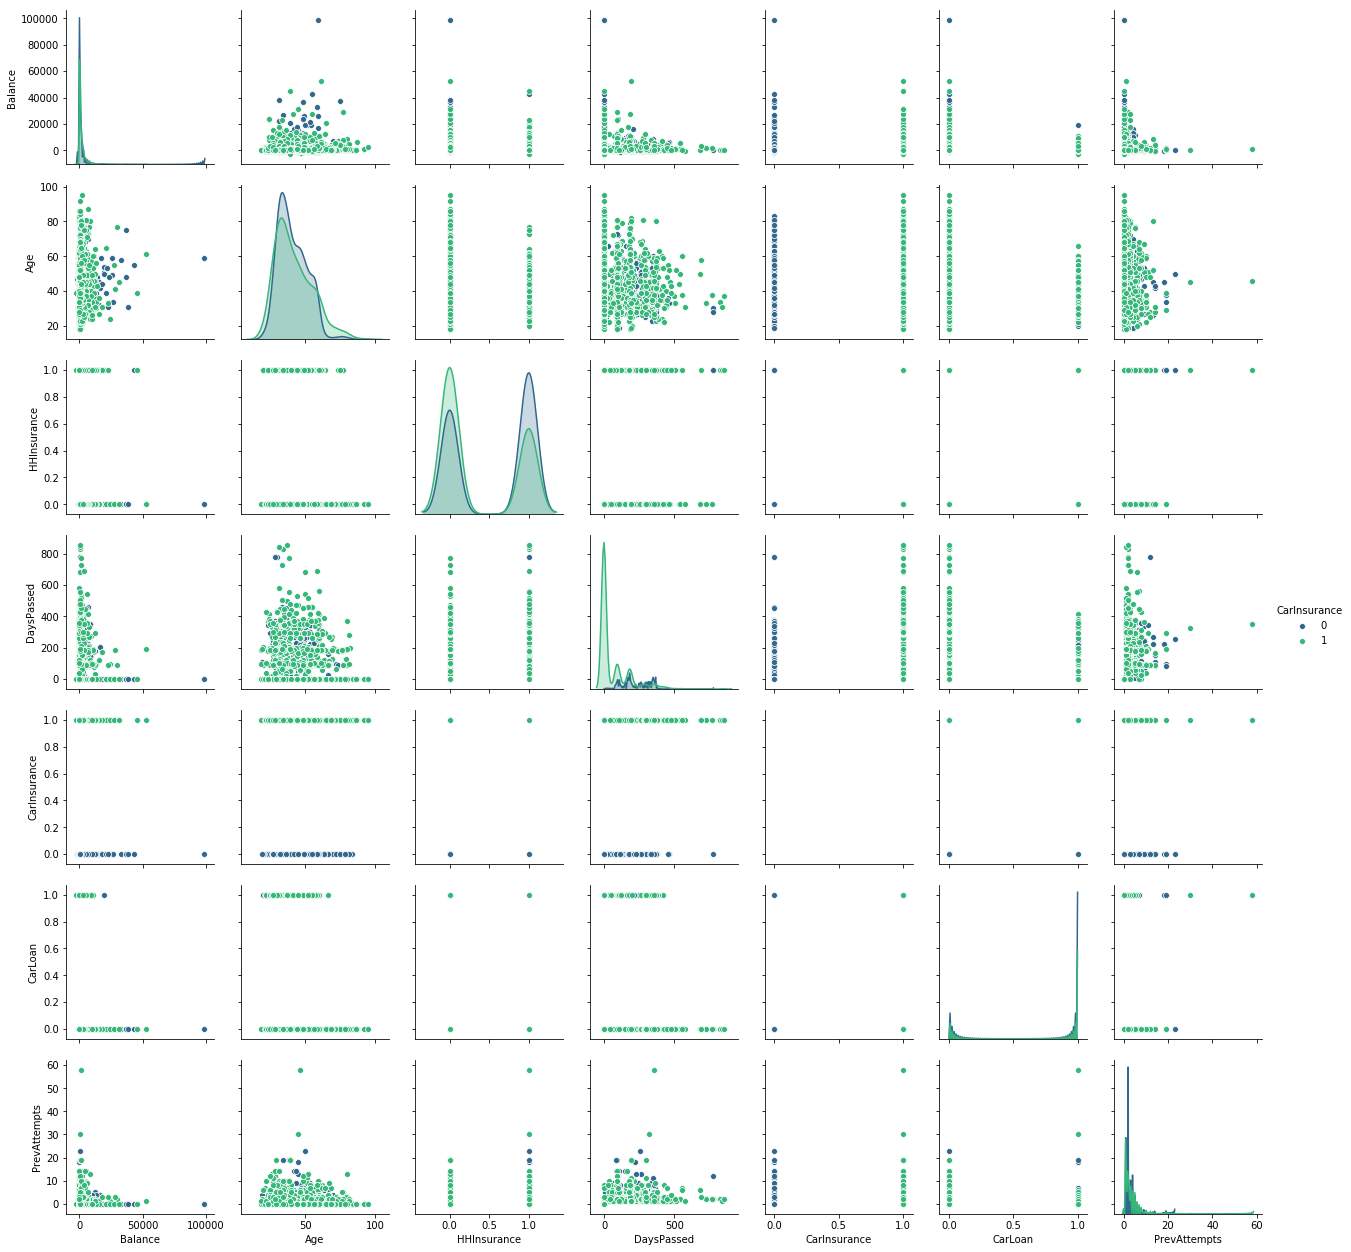

In [27]:
imp_features = ['Balance' , 'Age', 'HHInsurance', 'DaysPassed', 'CarInsurance', 'CarLoan', 'PrevAttempts']
sns.pairplot(Insurance_Data[imp_features], hue = 'CarInsurance', palette = 'viridis', size= 2.5)
plt.show()

In [ ]:
#Observations :
#Target Variable is Car insurance
#Number of people with more age have more car insurance#Age its interesting to see that the seniors are more likely to buy car insurance

#For balance , the data points at upper right corner might be an outlier
#carloan: car loans are less likely to buy
#NoOfContacts : Too many contacts causes customer attrition
#DaysPassed : It looks like , the more days passed since the last contact, the better
##preattempts : Also, more pre attempts , less likely to buy
##HHinsurance : Household insured are less likely to buy car insurance

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


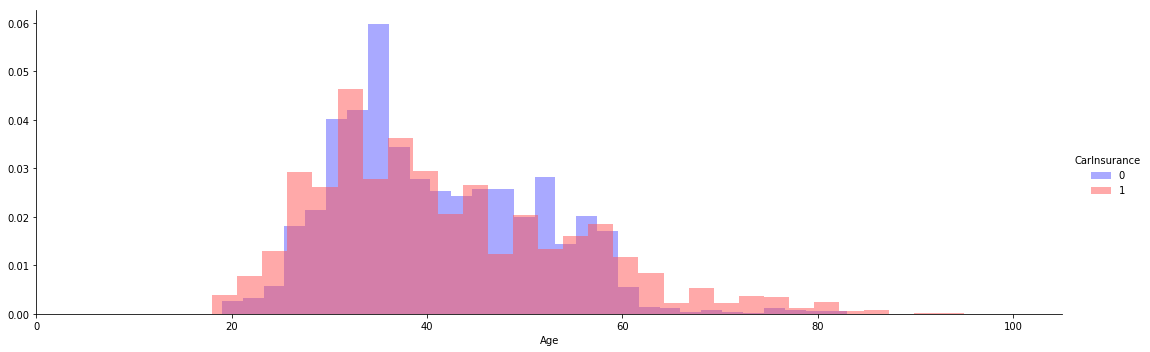

In [28]:
facet = sns.FacetGrid(Insurance_Data, hue = 'CarInsurance', size= 5, aspect=3, palette= 'seismic')
facet.map(plt.hist,'Age', bins=30, alpha=0.5 , normed=True)
facet.set(xlim=(0, Insurance_Data.Age.max()+10))
facet.add_legend()

In [32]:
#next check categorical features
categorical_col = Insurance_Data.select_dtypes (include = ['object']).columns
#we 
categorical_col_plot = categorical_col[(categorical_col !='CallStart') & 
                                        (categorical_col != 'CallEnd')]

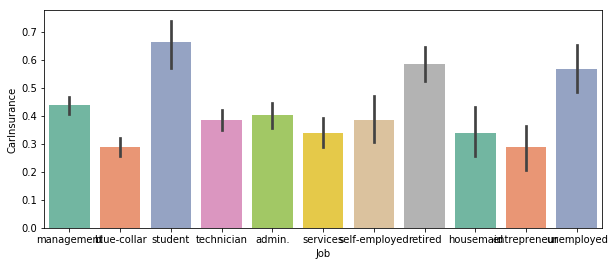

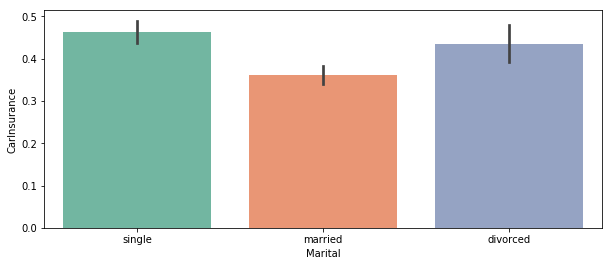

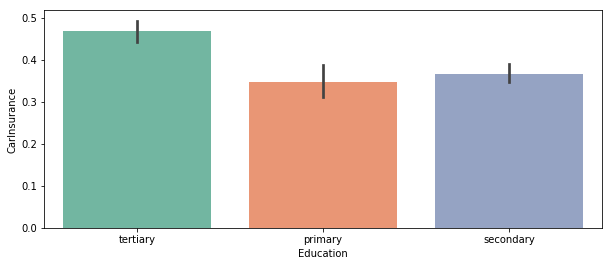

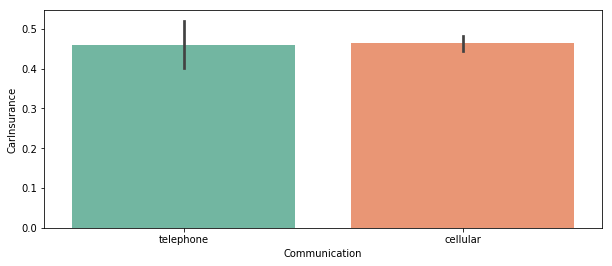

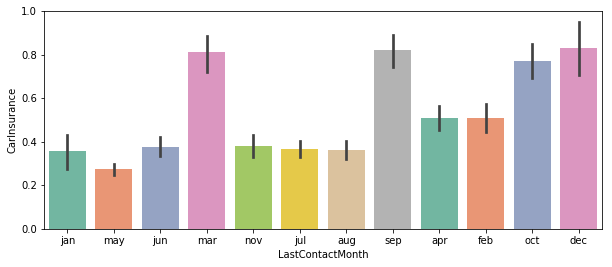

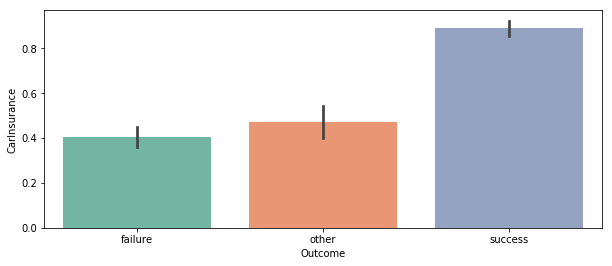

In [36]:
#this 
for feature in categorical_col_plot :
    plt.figure(figsize =[10,4])
    sns.barplot(feature, 'CarInsurance', data= Insurance_Data, palette= 'Set2')

In [ ]:
#job : Student is more likely to buy insurance than retired and unemployed folks
#marital status : married people are less likely to buy insurance. opportunities for developing 
## family insurance business

In [38]:
Insurance_Data['Balance'].describe()

count     4000.000000
mean      1532.937250
std       3511.452489
min      -3058.000000
25%        111.000000
50%        551.500000
75%       1619.000000
max      98417.000000
Name: Balance, dtype: float64

In [39]:
Insurance_Data[Insurance_Data['Balance'] > 8000] #Subsetting data 

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
21,22,80,retired,married,secondary,0,8304,0,0,telephone,8,sep,3,91,13,success,17:37:41,17:47:47,1
61,62,39,entrepreneur,married,secondary,0,11887,0,0,cellular,18,nov,2,-1,0,NaN,16:56:27,17:16:08,1
78,79,34,management,single,tertiary,0,11350,1,0,cellular,15,may,1,176,1,failure,15:14:20,15:16:53,0
83,84,49,retired,single,primary,0,25824,0,0,NaN,17,jun,1,-1,0,NaN,10:54:42,10:56:16,0
102,103,46,technician,married,secondary,0,9299,0,0,cellular,19,jul,1,276,2,other,15:58:44,16:17:52,1
103,104,56,retired,married,primary,0,9367,0,0,cellular,4,may,2,-1,0,NaN,15:33:30,15:43:47,1
158,159,33,management,single,tertiary,0,8038,1,0,cellular,19,nov,1,-1,0,NaN,09:40:58,09:41:58,0
163,164,61,self-employed,divorced,tertiary,0,52587,0,0,cellular,15,feb,3,189,1,success,16:53:39,17:00:13,1
171,172,44,blue-collar,married,secondary,0,16178,1,0,cellular,21,nov,1,-1,0,NaN,13:55:29,14:00:26,0
200,201,56,blue-collar,married,primary,0,8163,0,0,cellular,14,aug,4,-1,0,NaN,10:49:49,11:10:20,1


In [40]:
 Insurance_Data = Insurance_Data.drop(Insurance_Data[Insurance_Data.index==1742].index) #last index is for reindexing data

In [41]:
Insurance_Data.shape

(3999, 19)

In [42]:
merge_data = pd.concat([Insurance_Data, Insurance_test], keys=['train', 'test'])

In [43]:
merge_data.shape

(4999, 19)

In [45]:
merge_data.drop(['CarInsurance', 'Id'], axis=1, inplace= True)

In [47]:
total_missing = merge_data.isnull().sum()
total_missing

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CallStart              0
CallEnd                0
dtype: int64

In [57]:
 percentage = total_missing / merge_data.isnull().sum().count()

In [58]:
percentage

Age                   0.000000
Job                   1.411765
Marital               0.000000
Education            12.705882
Default               0.000000
Balance               0.000000
HHInsurance           0.000000
CarLoan               0.000000
Communication        66.058824
LastContactDay        0.000000
LastContactMonth      0.000000
NoOfContacts          0.000000
DaysPassed            0.000000
PrevAttempts          0.000000
Outcome             223.411765
CallStart             0.000000
CallEnd               0.000000
dtype: float64

In [66]:
#combine total and percentage values
NAs = pd.concat([total_missing,percentage ], axis=1,keys = ['Total', 'Percentage'])
NAs

,Total,Percentage
Age,0,0.000000
Job,24,1.411765
Marital,0,0.000000
Education,216,12.705882
Default,0,0.000000
Balance,0,0.000000
HHInsurance,0,0.000000
CarLoan,0,0.000000
Communication,1123,66.058824
LastContactDay,0,0.000000


In [67]:
NAs[NAs.Total>0].sort_values(by='Total', ascending=False)

,Total,Percentage
Outcome,3798,223.411765
Communication,1123,66.058824
Education,216,12.705882
Job,24,1.411765


In [68]:
merge_data_df = merge_data.copy()

In [71]:
merge_data_df.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

In [72]:
len(merge_data_df[merge_data_df['DaysPassed']== -1])

3798

In [123]:
merge_data_df.loc[merge_data_df.Outcome.isna(),'Outcome']= 'NoPrev'

In [76]:
merge_data_df.groupby('Outcome')['Age'].count()

Outcome
failure    548
other      248
success    405
Name: Age, dtype: int64

In [77]:
merge_data_df['Communication'].value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [78]:
merge_data_df['Communication'].fillna('None', inplace= True)

In [79]:
merge_data_df['Communication'].value_counts()

cellular     3529
None         1123
telephone     347
Name: Communication, dtype: int64

In [80]:
merge_data_df['Education'].value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

In [101]:
#Create job-education level mode mapping
edu_mode= []

In [106]:
#what are different job types
job_types = merge_data_df.Job.value_counts().index
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'unemployed', 'student', 'entrepreneur',
       'housemaid'],
      dtype='object')

In [103]:
#checking which jobs are most frequesnt
merge_data_df['Job'].value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [105]:
edu_map = pd.Series(edu_mode, index= merge_data_df.Job.value_counts().index)
edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

In [107]:
#applying the mapping to missing education observations
for j in job_types :
    merge_data_df.loc[(merge_data_df['Education'].isnull()) &
                     (merge_data_df['Job']==j), 'Education'] = edu_map.loc[edu_map.index==j][0]

In [108]:
merge_data_df['Education'].isna().sum()

11

In [109]:
merge_data_df['Job'].isna().sum()

24

In [110]:
merge_data_df['Education'].fillna('None', inplace= True)

In [111]:
merge_data_df['Education'].isna().sum()

0

In [118]:
edu_map.loc[edu_map.index==j]

housemaid    primary
dtype: object

In [119]:
merge_data_df['Job'].fillna('None', inplace= True)

In [120]:
merge_data_df['Job'].isna().sum()

0

In [124]:
merge_data_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
dtype: int64

In [126]:
# separating 
numeric_dtypes = merge_data_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_dtypes

['Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts']

In [127]:
merge_data_df_num = merge_data_df[numeric_dtypes]

In [129]:
# separating 
categorical_dtypes = merge_data_df.select_dtypes(include=['object']).columns.tolist()
categorical_dtypes

['Job',
 'Marital',
 'Education',
 'Communication',
 'LastContactMonth',
 'Outcome',
 'CallStart',
 'CallEnd']

In [131]:
#removing call start and call end
merge_data_df_cat = merge_data_df[['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']]

In [132]:
merge_data_df_cat_dummies = pd.get_dummies(merge_data_df_cat)

In [133]:
#combining numeric and categorical data
Insurance_Data_Dummy = pd.concat([merge_data_df_num, merge_data_df_cat_dummies], axis= 1)

In [134]:
Insurance_Data_Dummy.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  Job_None       ...         \
train 0             2          -1             0         0       ...          
      1             5          -1             0         0       ...          
      2             1         119             1         0       ...          
      3             2          -1             0         0       ...          
      4             1          -1             0         0       ...          

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 0               1                0              0                0  
      1               1                0              0                0  
      2               0                1              0                0  
      3               1                0              0                0  
      4               1                0              0                0  

[5 rows x 47 columns]

In [136]:
#checking if there are any null values before we can run the model
Insurance_Data_Dummy.isnull().sum(axis=0)

Age                        0
Default                    0
Balance                    0
HHInsurance                0
CarLoan                    0
LastContactDay             0
NoOfContacts               0
DaysPassed                 0
PrevAttempts               0
Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_None             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMonth_dec       0
LastContactMon

In [137]:
#split train and test
idx = pd.IndexSlice
train_df = Insurance_Data_Dummy.loc[idx[['train', ],:]]
test_df = Insurance_Data_Dummy.loc[idx[['test', ],:]]

In [138]:
#row create a label here 
train_label = Insurance_Data['CarInsurance']
print(train_df.shape)
print(test_df.shape)

(3999, 47)
(1000, 47)


In [140]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, train_label, train_size=0.7, random_state=100)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
lr = LogisticRegression()

In [143]:
#fit model to training data
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
y_pred = lr.predict(X_test)

In [145]:
#computing model performance metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [146]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)

In [148]:
print("Accuracy : ",accuracy)
print("f1 score : ",f1)
print("Precesion : ",precision)
print("Recall : ",recall)
print("Roc Score : ",roc_auc)

Accuracy :  0.7241666666666666
f1 score :  0.5836477987421385
Precesion :  0.7204968944099379
Recall :  0.4904862579281184
Roc Score :  0.6833449171346232
